In [1]:
# Creating a NN with LSTM

In [2]:
# import libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
# get the stock market data
# we will get the last 10 years of the data:
# we will use google to train the data:

start = '2012-01-01'
end = '2022-12-21'
stock = 'GOOG'

data = yf.download(stock, start, end)

/tmp/ipython-input-1693312878.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock, start, end)
[*********************100%***********************]  1 of 1 completed


In [4]:
data

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2012-01-03,16.475199,16.543040,16.152335,16.166449,147611217
2012-01-04,16.546259,16.595036,16.356602,16.465791,114989399
2012-01-05,16.316738,16.439545,16.247907,16.393988,131808205
2012-01-06,16.094151,16.341249,16.088455,16.320203,108119746
2012-01-09,15.411779,16.019378,15.381325,16.006996,233776981
...,...,...,...,...,...
2022-12-14,94.746811,96.645528,93.384911,94.975455,26452900
2022-12-15,90.661102,93.474382,89.895656,92.987279,28298800


In [5]:
# change dates to numbers
data.reset_index(inplace=True)

In [6]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2012-01-03,16.475199,16.543040,16.152335,16.166449,147611217
1,2012-01-04,16.546259,16.595036,16.356602,16.465791,114989399
2,2012-01-05,16.316738,16.439545,16.247907,16.393988,131808205
3,2012-01-06,16.094151,16.341249,16.088455,16.320203,108119746
4,2012-01-09,15.411779,16.019378,15.381325,16.006996,233776981
...,...,...,...,...,...,...
2756,2022-12-14,94.746811,96.645528,93.384911,94.975455,26452900
2757,2022-12-15,90.661102,93.474382,89.895656,92.987279,28298800
2758,2022-12-16,90.323097,91.207837,89.478122,90.661084,48485500


In [7]:
ma_100_days = data.Close.rolling(100).mean()

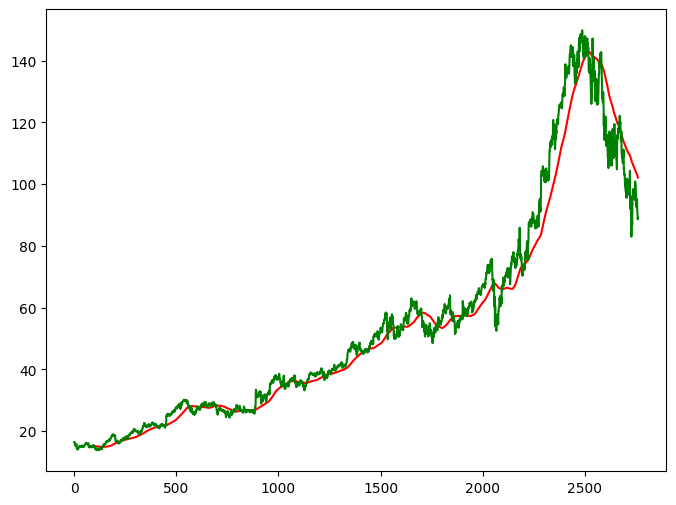

In [8]:
plt.figure(figsize=(8, 6))
plt.plot(ma_100_days,'r')
plt.plot(data.Close, 'g')
plt.show()

In [9]:
ma_200_days = data.Close.rolling(200).mean()

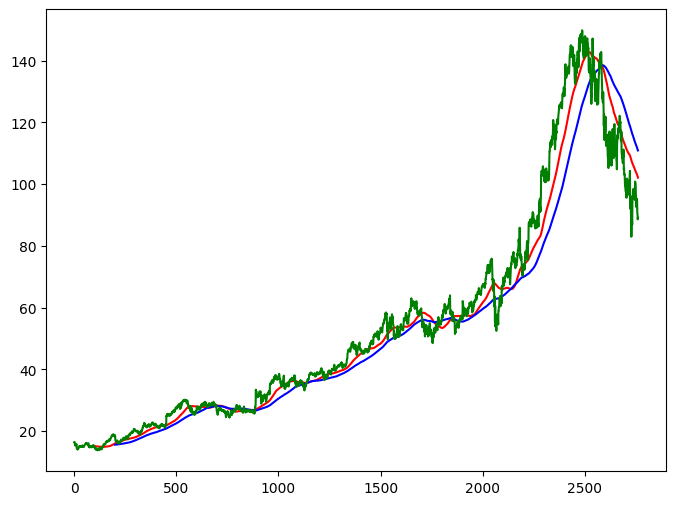

In [10]:
plt.figure(figsize=(8, 6))
plt.plot(ma_100_days,'r')
plt.plot(ma_200_days, 'b')
plt.plot(data.Close, 'g')
plt.show()

In [11]:
# we are focusing on the closing price
data.dropna(inplace=True)

In [12]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [13]:
data_train.shape[0]

2208

In [14]:
data_test.shape[0]

553

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [16]:
data_train_scale = scaler.fit_transform(data_train)

In [17]:
x = []
y = []
for i in range(100, data_train_scale.shape[0]):
  x.append(data_train_scale[i-100: i])
  y.append(data_train_scale[i, 0])

In [24]:
x,y = np.array(x), np.array(y)

In [22]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [25]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [26]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x, y, epochs=50, batch_size=32, verbose = 1)

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 27s 297ms/step - loss: 0.0721
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 19s 292ms/step - loss: 0.0088
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 20s 284ms/step - loss: 0.0072
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 22s 306ms/step - loss: 0.0059
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 19s 286ms/step - loss: 0.0052
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 22s 327ms/step - loss: 0.0048
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 40s 306ms/step - loss: 0.0050
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 19s 283ms/step - loss: 0.0046
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 21s 295ms/step - loss: 0.0048
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 19s 289ms/step - loss: 0.0044
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 20s 281ms/step - loss: 0.0042
Epoch 12/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 20s 308ms/step - loss: 0.0046
Epoch 13/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 20s 305ms/step - loss: 0.0035
Epoch 14/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 21s 307ms/step - loss: 0.0034
Epoch 15/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 19s 

In [27]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [28]:
# Now we want to test out model

past_100_days = data_train.tail(100)

data_test = pd.concat([past_100_days, data_test], ignore_index=True)

In [42]:
data_test_scale = scaler.transform(data_test)

In [43]:
x = []
y = []
for i in range(100, data_test_scale.shape[0]):
  x.append(data_test_scale[i-100: i])
  y.append(data_test_scale[i, 0])

x, y = np.array(x), np.array(y)

In [44]:
y_predict = model.predict(x)

18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step


In [45]:
y_predict

array([[0.12480207],
       [0.12496901],
       [0.12593138],
       [0.12773828],
       [0.13031478],
       [0.13356897],
       [0.13727832],
       [0.141204  ],
       [0.14522074],
       [0.14931235],
       [0.15356237],
       [0.15791243],
       [0.1622664 ],
       [0.166323  ],
       [0.16986755],
       [0.17293315],
       [0.17565662],
       [0.17827651],
       [0.1812668 ],
       [0.18505275],
       [0.18994184],
       [0.19593543],
       [0.20282325],
       [0.21031986],
       [0.218067  ],
       [0.22574808],
       [0.23306096],
       [0.23981658],
       [0.24580443],
       [0.2508922 ],
       [0.25497082],
       [0.25793606],
       [0.2598725 ],
       [0.2610039 ],
       [0.26167235],
       [0.26208895],
       [0.2625078 ],
       [0.26322746],
       [0.26448107],
       [0.2663349 ],
       [0.26873046],
       [0.27160543],
       [0.274793  ],
       [0.27806318],
       [0.28118113],
       [0.28383037],
       [0.28571352],
       [0.286

In [37]:
#scale = 1/scaler.scale_

In [38]:
#y_predict = y_predict*scale #predicted values

In [39]:
#y = y*scale #actual values

In [46]:
y_predict = scaler.inverse_transform(y_predict.reshape(-1, 1))
y = scaler.inverse_transform(y.reshape(-1, 1))

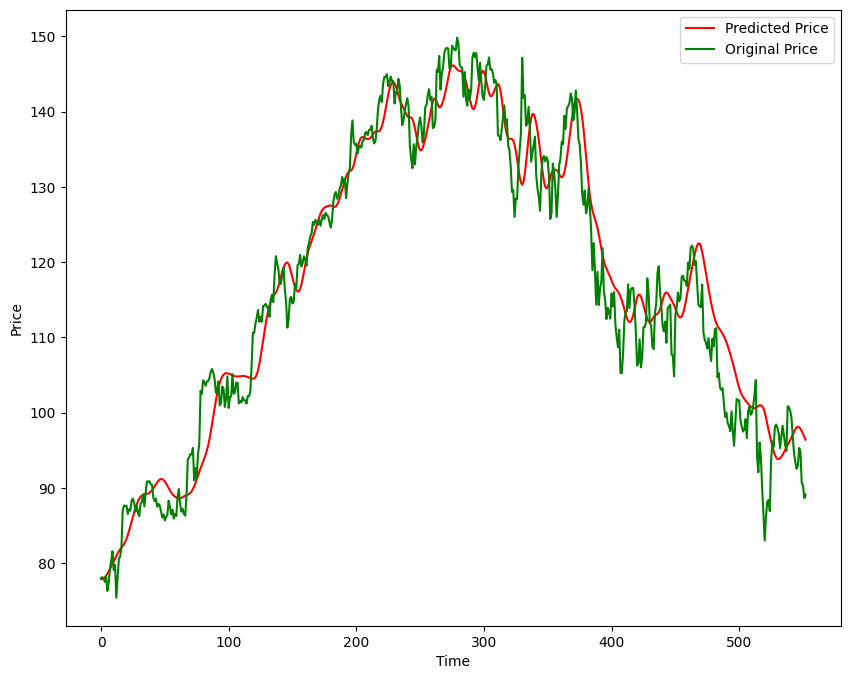

In [47]:
plt.figure(figsize=(10, 8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [48]:
model.save('Stock Prediction Model.keras')